In [1]:
from google.colab import files
uploaded = files.upload()


Saving WA_Fn-UseC_-HR-Employee-Attrition.csv to WA_Fn-UseC_-HR-Employee-Attrition.csv


In [2]:
# Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Display all columns
pd.set_option('display.max_columns', None)

# Load dataset
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [3]:
# Shape and basic info
print("Shape:", df.shape)
print("\nData Types:\n", df.dtypes)

# Check for null values
print("\nMissing Values:\n", df.isnull().sum())


Shape: (1470, 35)

Data Types:
 Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel       

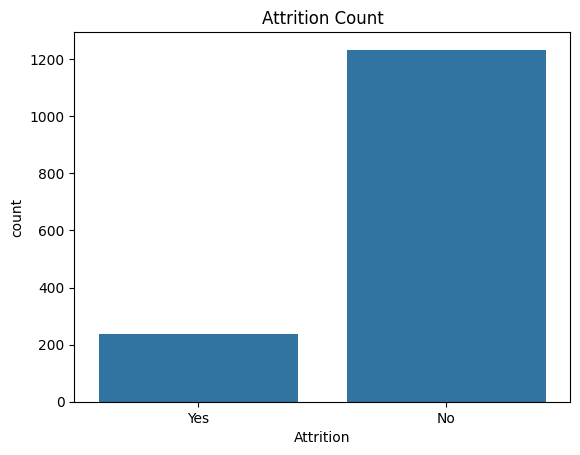

Attrition Rate:
 Attrition
No     83.877551
Yes    16.122449
Name: proportion, dtype: float64


In [4]:
# Count plot for target variable
sns.countplot(x='Attrition', data=df)
plt.title("Attrition Count")
plt.show()

# Percentage of attrition
attrition_rate = df['Attrition'].value_counts(normalize=True) * 100
print("Attrition Rate:\n", attrition_rate)


In [5]:
# Describe numerical features grouped by Attrition
df.groupby('Attrition')[['Age', 'MonthlyIncome', 'JobSatisfaction', 'YearsAtCompany']].mean()


,Age,MonthlyIncome,JobSatisfaction,YearsAtCompany
Attrition,,,,
No,37.561233,6832.739659,2.778589,7.369019
Yes,33.607595,4787.092827,2.468354,5.130802


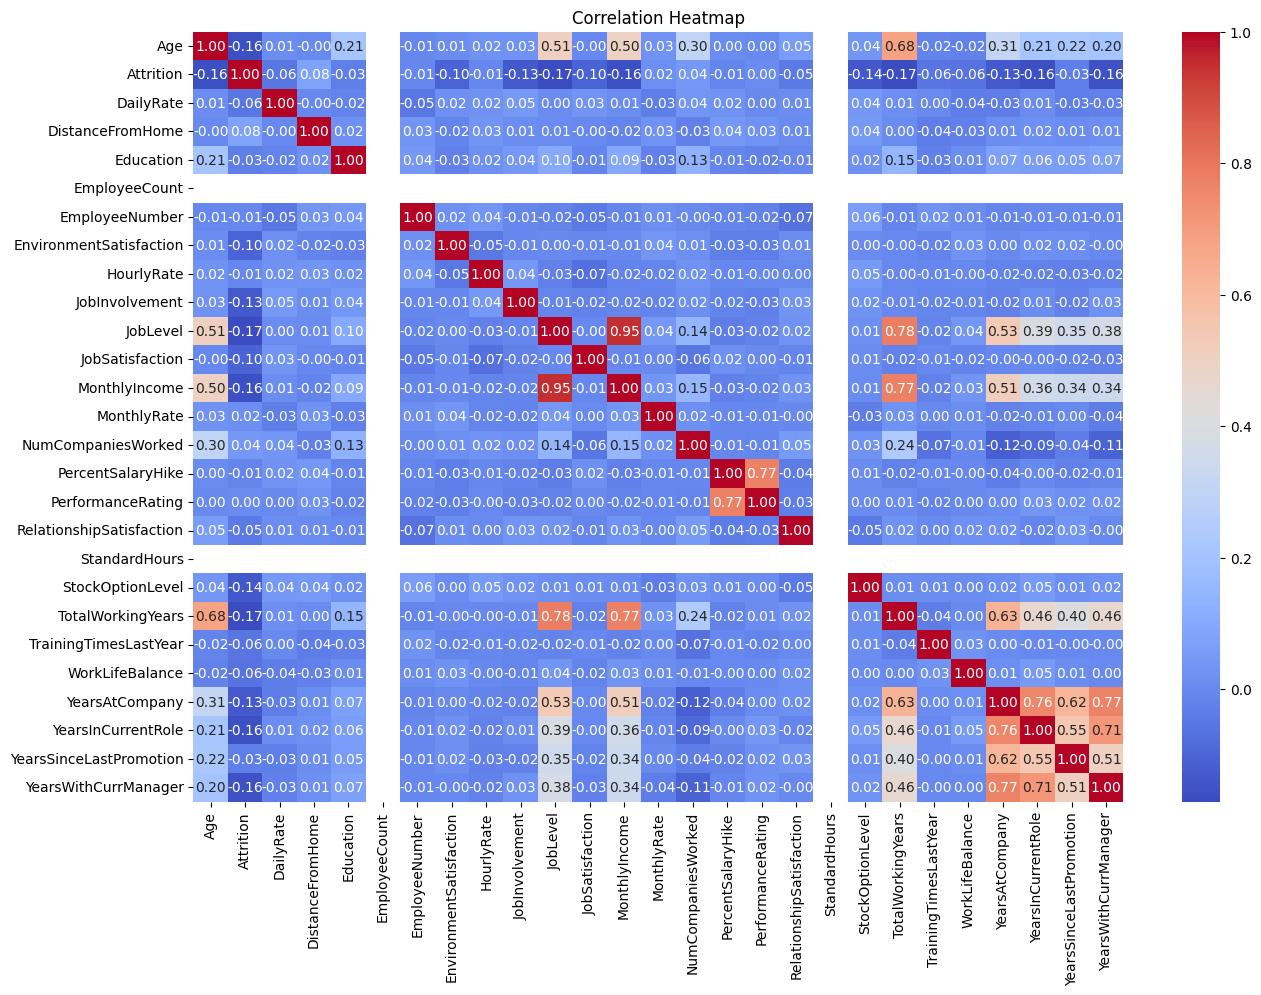

In [7]:
# Encode Attrition to numeric temporarily for correlation
df_corr = df.copy()
df_corr['Attrition'] = df_corr['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)

# Select only numerical columns for correlation
df_numeric = df_corr.select_dtypes(include=np.number)

plt.figure(figsize=(15,10))
sns.heatmap(df_numeric.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

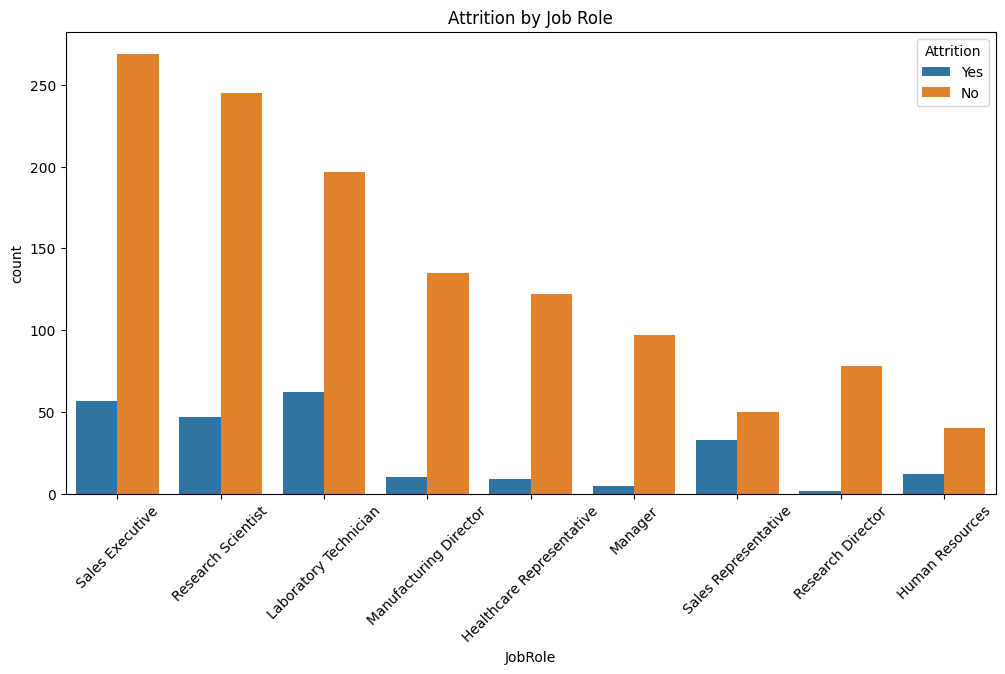

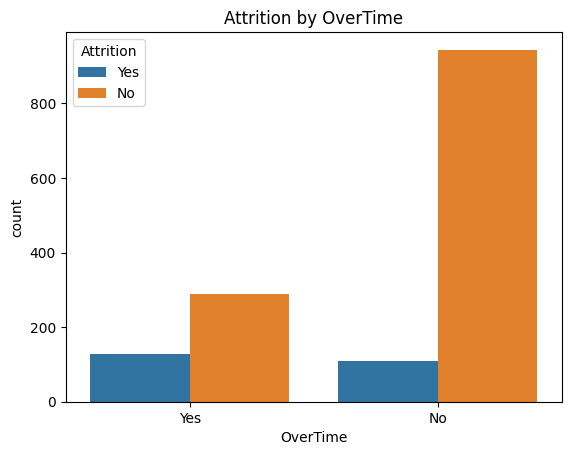

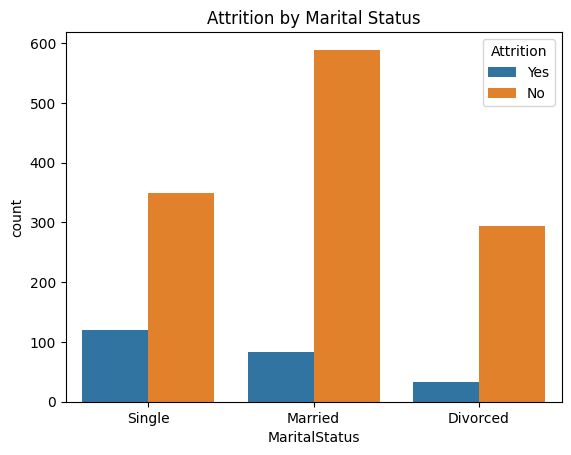

In [8]:
# Attrition by JobRole
plt.figure(figsize=(12,6))
sns.countplot(x='JobRole', hue='Attrition', data=df)
plt.xticks(rotation=45)
plt.title("Attrition by Job Role")
plt.show()

# Attrition by OverTime
sns.countplot(x='OverTime', hue='Attrition', data=df)
plt.title("Attrition by OverTime")
plt.show()

# Attrition by MaritalStatus
sns.countplot(x='MaritalStatus', hue='Attrition', data=df)
plt.title("Attrition by Marital Status")
plt.show()


In [9]:
from sklearn.preprocessing import LabelEncoder

# Encode binary categorical variables
le = LabelEncoder()
df['Attrition'] = le.fit_transform(df['Attrition'])  # Yes=1, No=0
df['OverTime'] = le.fit_transform(df['OverTime'])    # Yes=1, No=0
df['Gender'] = le.fit_transform(df['Gender'])        # Male=1, Female=0

# One-hot encode remaining categorical columns
df = pd.get_dummies(df, columns=['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus'], drop_first=True)

# Drop columns not needed
df.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis=1, inplace=True)

print("Final shape after encoding:", df.shape)


Final shape after encoding: (1470, 45)


In [10]:
from sklearn.model_selection import train_test_split

# Features and target
X = df.drop('Attrition', axis=1)
y = df['Attrition']

# Split into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Train set shape:", X_train.shape)
print("Test set shape:", X_test.shape)


Train set shape: (1176, 44)
Test set shape: (294, 44)


In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

# Evaluation
print("🔹 Logistic Regression Report")
print(classification_report(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("Accuracy:", accuracy_score(y_test, y_pred_lr))


🔹 Logistic Regression Report
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       247
           1       0.62      0.34      0.44        47

    accuracy                           0.86       294
   macro avg       0.75      0.65      0.68       294
weighted avg       0.84      0.86      0.84       294

Confusion Matrix:
 [[237  10]
 [ 31  16]]
Accuracy: 0.8605442176870748


In [13]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Evaluation
print("🔹 Random Forest Report")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))


🔹 Random Forest Report
              precision    recall  f1-score   support

           0       0.85      0.97      0.90       247
           1       0.30      0.06      0.11        47

    accuracy                           0.83       294
   macro avg       0.57      0.52      0.50       294
weighted avg       0.76      0.83      0.78       294

Confusion Matrix:
 [[240   7]
 [ 44   3]]
Accuracy: 0.826530612244898


In [14]:
!pip install xgboost --quiet
from xgboost import XGBClassifier

# XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

# Evaluation
print("🔹 XGBoost Report")
print(classification_report(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:26:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


🔹 XGBoost Report
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       247
           1       0.71      0.26      0.38        47

    accuracy                           0.86       294
   macro avg       0.79      0.62      0.65       294
weighted avg       0.85      0.86      0.84       294

Confusion Matrix:
 [[242   5]
 [ 35  12]]
Accuracy: 0.8639455782312925


In [15]:
acc_lr = accuracy_score(y_test, y_pred_lr)
acc_rf = accuracy_score(y_test, y_pred_rf)
acc_xgb = accuracy_score(y_test, y_pred_xgb)

print("🔸 Accuracy Comparison")
print(f"Logistic Regression: {acc_lr:.2f}")
print(f"Random Forest:       {acc_rf:.2f}")
print(f"XGBoost:             {acc_xgb:.2f}")


🔸 Accuracy Comparison
Logistic Regression: 0.86
Random Forest:       0.83
XGBoost:             0.86


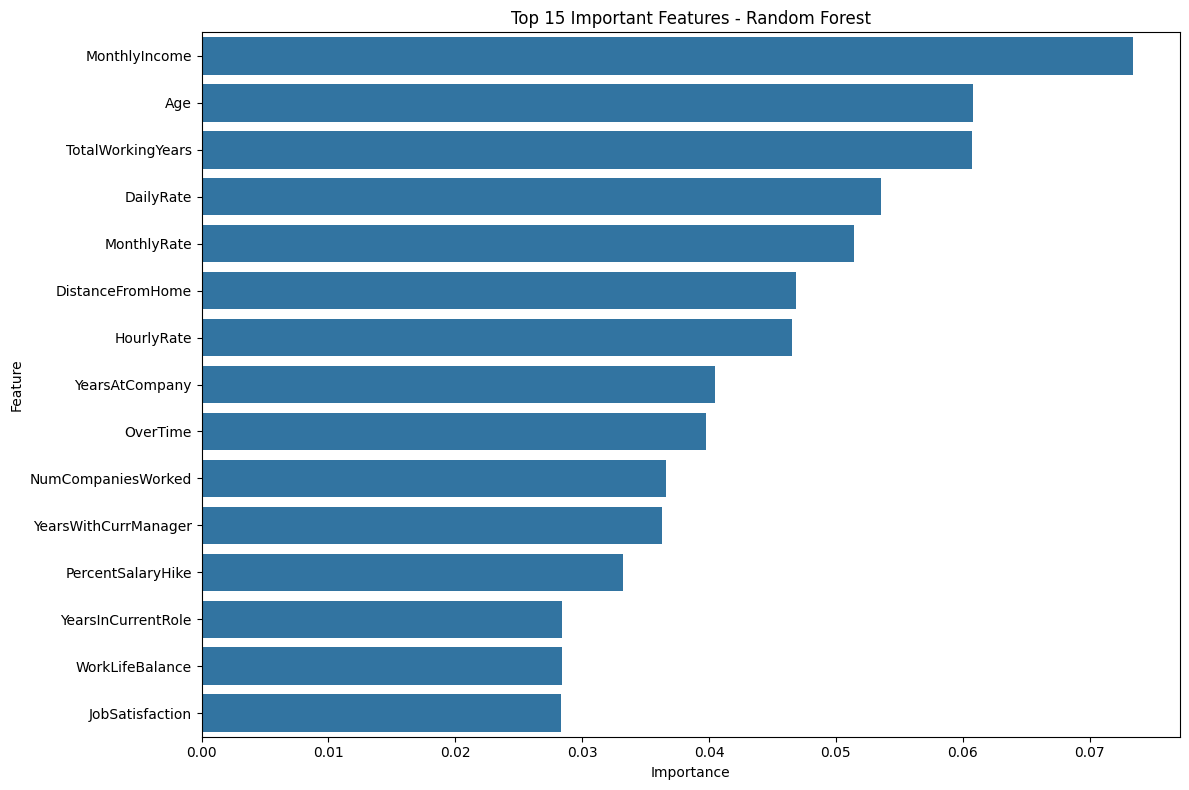

In [16]:
# Feature importance using Random Forest
importances = rf.feature_importances_
features = X.columns

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(15))
plt.title("Top 15 Important Features - Random Forest")
plt.tight_layout()
plt.show()


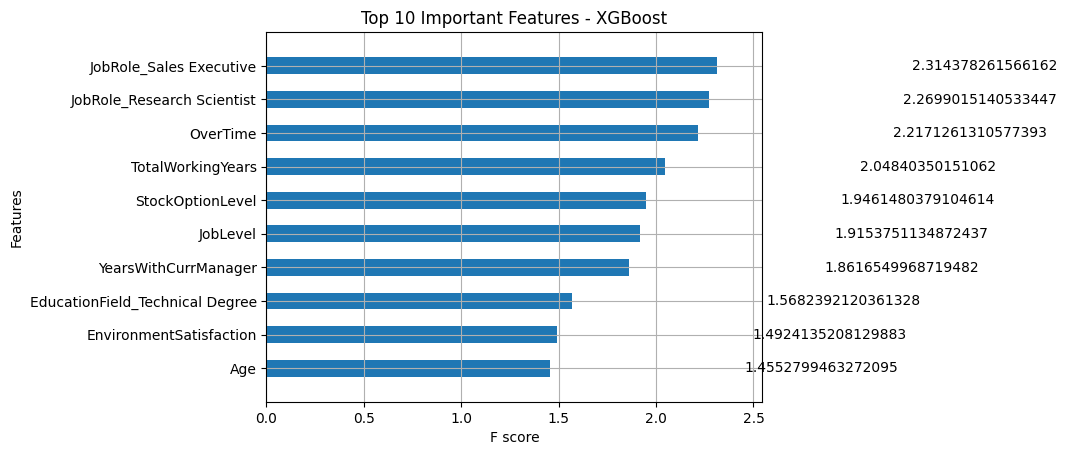

In [17]:
# Feature importance from XGBoost
from xgboost import plot_importance
plot_importance(xgb, max_num_features=10, importance_type='gain', height=0.5)
plt.title("Top 10 Important Features - XGBoost")
plt.show()
